In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
from sklearn.utils import shuffle

def random_forest_classifier(csv_file):

    eeg_features_scaled = pd.read_csv(csv_file)
    eeg_features_scaled = shuffle(eeg_features_scaled, random_state=42)

    X = eeg_features_scaled.drop(columns=['State', 'Subject'])
    y = eeg_features_scaled['State']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")

    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    y_bin = LabelBinarizer().fit_transform(y_test)
    fpr, tpr, thresholds = roc_curve(y_bin, rf_classifier.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1 - Specificity (False Positive Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('Sensitivity vs 1 - Specificity Curve')
    plt.legend(loc="lower right")
    plt.show()


Accuracy: 99.72%
Precision: 99.72%
Recall: 99.72%
F1 Score: 99.72%


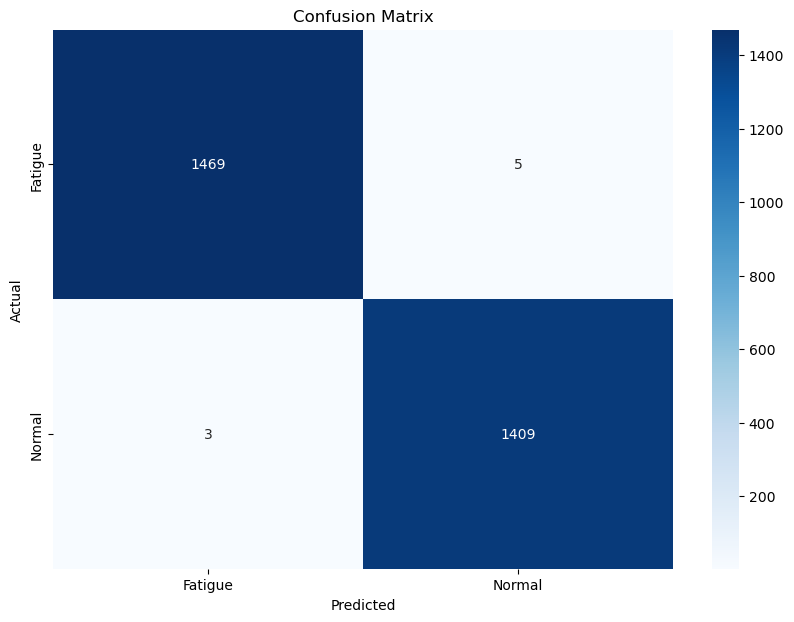

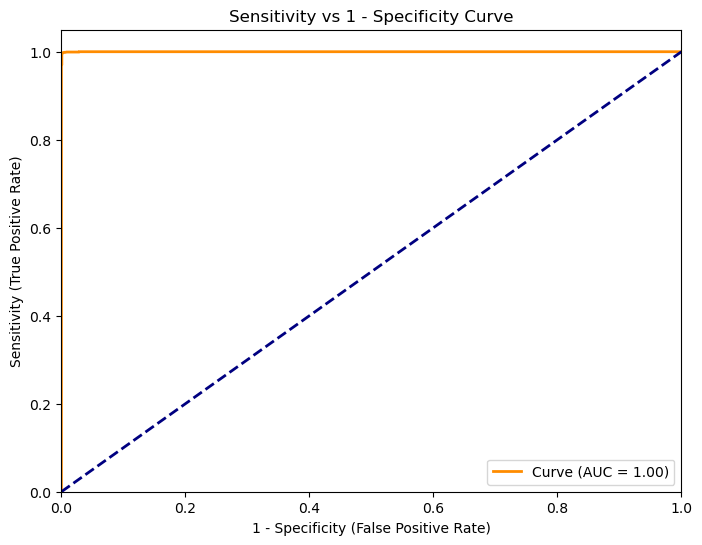

In [2]:
eeg_features_scaled = 'eeg_features_scaled.csv'
random_forest_classifier(eeg_features_scaled)

Accuracy: 99.69%
Precision: 99.69%
Recall: 99.69%
F1 Score: 99.69%


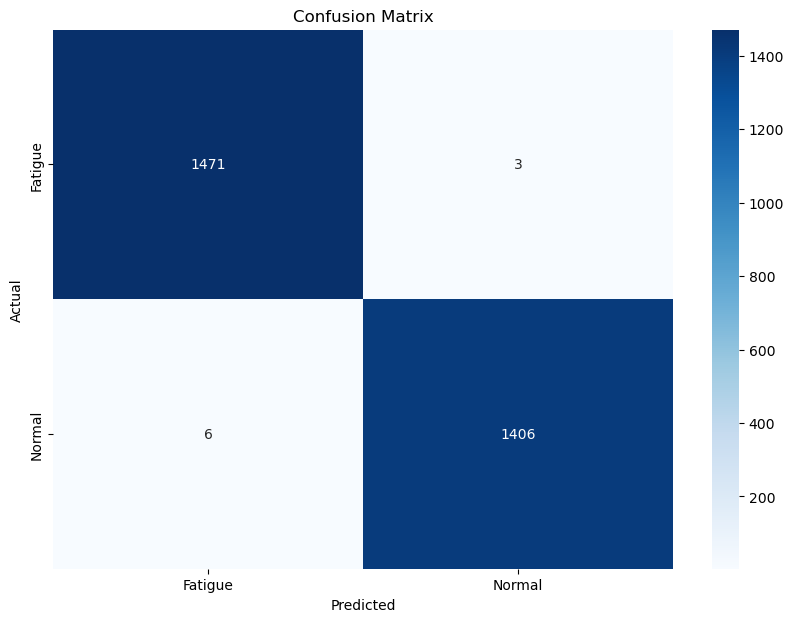

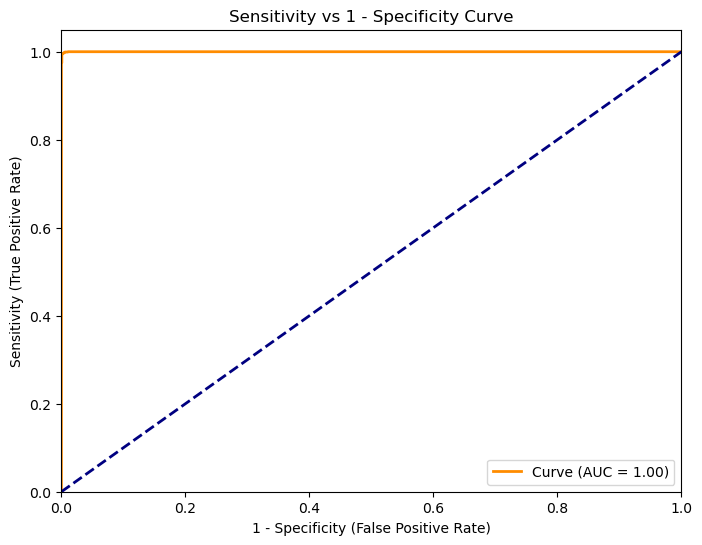

In [3]:
eeg_features_pca = 'eeg_features_with_optimal_pca.csv'
random_forest_classifier(eeg_features_pca)

Accuracy: 98.51%
Precision: 98.51%
Recall: 98.51%
F1 Score: 98.51%


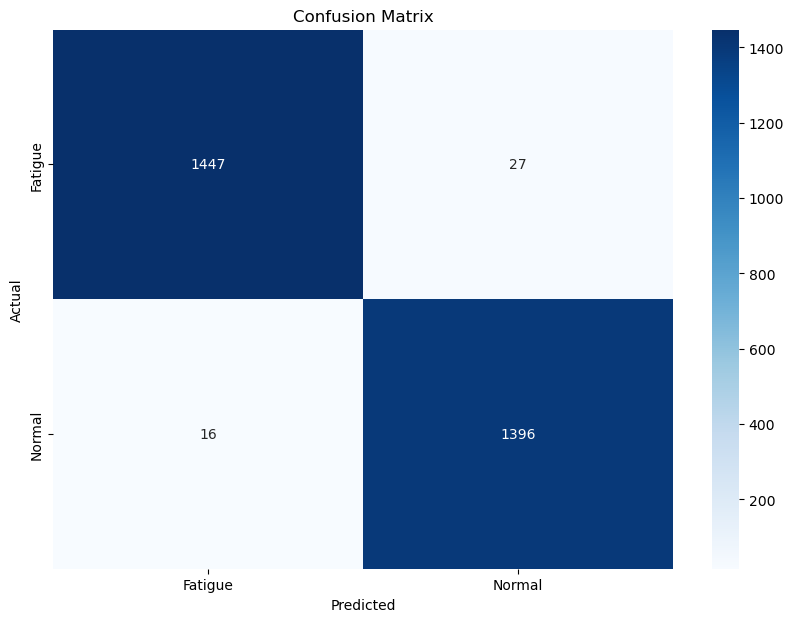

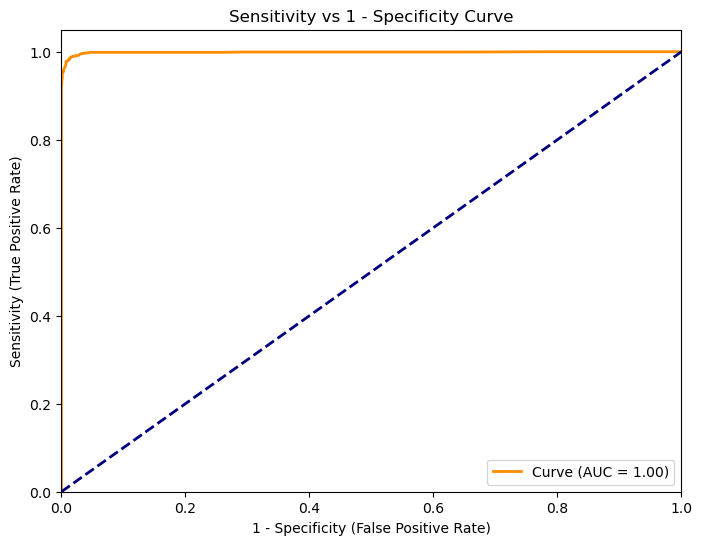

In [4]:
eeg_features_top = 'eeg_top_20_features.csv'
random_forest_classifier(eeg_features_top)